# Pandas tutorial (Advanced)

The following content is the **Advanced**  part. Please make sure you have studied the **Basic**  part before you start.

In [1]:
import pandas as pd
import numpy as np
np.random.seed(0)

## Hierarchical indexing (MultiIndex)

### Creating a MultiIndex

In [2]:
iterables = [
    ["temperature","rainfall","runoff"],
    ["max","mean","min"],
]
idx = pd.MultiIndex.from_product(iterables, names=["factor", "method"])
idx

MultiIndex([('temperature',  'max'),
            ('temperature', 'mean'),
            ('temperature',  'min'),
            (   'rainfall',  'max'),
            (   'rainfall', 'mean'),
            (   'rainfall',  'min'),
            (     'runoff',  'max'),
            (     'runoff', 'mean'),
            (     'runoff',  'min')],
           names=['factor', 'method'])

In [3]:
df = pd.DataFrame(np.random.randn(9, 4), index=idx)
df

0         1         2         3
factor      method                                        
temperature max     1.764052  0.400157  0.978738  2.240893
            mean    1.867558 -0.977278  0.950088 -0.151357
            min    -0.103219  0.410599  0.144044  1.454274
rainfall    max     0.761038  0.121675  0.443863  0.333674
            mean    1.494079 -0.205158  0.313068 -0.854096
            min    -2.552990  0.653619  0.864436 -0.742165
runoff      max     2.269755 -1.454366  0.045759 -0.187184
            mean    1.532779  1.469359  0.154947  0.378163
            min    -0.887786 -1.980796 -0.347912  0.156349

In [4]:
idx = pd.MultiIndex.from_arrays(iterables, names=["factor", "method"])
idx

MultiIndex([('temperature',  'max'),
            (   'rainfall', 'mean'),
            (     'runoff',  'min')],
           names=['factor', 'method'])

In [5]:
df = pd.DataFrame(np.random.randn(3, 4), index=idx)
df

,,0,1,2,3
factor,method,,,,
temperature,max,1.230291,1.202380,-0.387327,-0.302303
rainfall,mean,-1.048553,-1.420018,-1.706270,1.950775
runoff,min,-0.509652,-0.438074,-1.252795,0.777490


You can  use `pd.MultiIndex.from_tuples()`, `pd.MultiIndex.from_frame()` to create a MultiIndex

### Get single index for a MultiIndex

In [6]:
iterables = [
    ["temperature","rainfall","runoff"],
    ["max","mean","min"],
]
idx = pd.MultiIndex.from_product(iterables, names=["factor", "method"])
df = pd.DataFrame(np.random.randn(9, 4), index=idx)
df.index

MultiIndex([('temperature',  'max'),
            ('temperature', 'mean'),
            ('temperature',  'min'),
            (   'rainfall',  'max'),
            (   'rainfall', 'mean'),
            (   'rainfall',  'min'),
            (     'runoff',  'max'),
            (     'runoff', 'mean'),
            (     'runoff',  'min')],
           names=['factor', 'method'])

In [7]:
df.index.get_level_values(0)

Index(['temperature', 'temperature', 'temperature', 'rainfall', 'rainfall',
       'rainfall', 'runoff', 'runoff', 'runoff'],
      dtype='object', name='factor')

In [8]:
df.index.get_level_values(1)

Index(['max', 'mean', 'min', 'max', 'mean', 'min', 'max', 'mean', 'min'], dtype='object', name='method')

## Apply and Applymap
* Apply: Apply a function along an axis of the DataFrame.
* Applymap: Apply a function to a Dataframe elementwise. You can address each element for specfic requirements.

In [9]:
df = pd.DataFrame(np.random.randn(3, 4))
df

,0,1,2,3
0,1.488252,1.895889,1.178780,-0.179925
1,-1.070753,1.054452,-0.403177,1.222445
2,0.208275,0.976639,0.356366,0.706573


In [10]:
df.apply(np.abs)

,0,1,2,3
0,1.488252,1.895889,1.178780,0.179925
1,1.070753,1.054452,0.403177,1.222445
2,0.208275,0.976639,0.356366,0.706573


In [11]:
func_x3 = lambda x: x**3 # lambda functiodn
df.apply(func_x3)

,0,1,2,3
0,3.296322,6.814576,1.637939,-0.005825
1,-1.227630,1.172412,-0.065537,1.826788
2,0.009035,0.931542,0.045257,0.352754


In [12]:
# This function don't have specific meaning. 
# It only defines a complex operation for each element of dataframe.
def func_range(x):
    if x > 1:
        return 1
    elif x< -1:
        return -1
    else:
        return np.abs(x)
df.applymap(func_range)

,0,1,2,3
0,1.000000,1.000000,1.000000,0.179925
1,-1.000000,1.000000,0.403177,1.000000
2,0.208275,0.976639,0.356366,0.706573


## Groupby
`Groupby()` can be used to group large amounts of data and compute operations on these groups.



In [13]:
iterables = [
    ["temperature","rainfall","runoff"],
    ["site1","site2","site3"],
]
idx = pd.MultiIndex.from_product(iterables, names=["factor", "method"])
df = pd.DataFrame(np.random.randn(9, 4), index=idx)
for n,subdf in df.groupby(by=["factor"]):
    print(n)
    print(subdf)

rainfall
                        0         1         2         3
factor   method                                        
rainfall site1   1.922942  1.480515  1.867559  0.906045
         site2  -0.861226  1.910065 -0.268003  0.802456
         site3   0.947252 -0.155010  0.614079  0.922207
runoff
                      0         1         2         3
factor method                                        
runoff site1   0.376426 -1.099401  0.298238  1.326386
       site2  -0.694568 -0.149635 -0.435154  1.849264
       site3   0.672295  0.407462 -0.769916  0.539249
temperature
                           0         1         2         3
factor      method                                        
temperature site1   0.010500  1.785870  0.126912  0.401989
            site2   1.883151 -1.347759 -1.270485  0.969397
            site3  -1.173123  1.943621 -0.413619 -0.747455


In [14]:
df.groupby(by=["factor"]).mean()

,0,1,2,3
factor,,,,
rainfall,0.669656,1.078523,0.737878,0.876903
runoff,0.118051,-0.280524,-0.302277,1.238300
temperature,0.240176,0.793911,-0.519064,0.207977


The dataframe generated is daily rainfall of Changi station in 2020. The columns and index represent no. of month and day, respectively.

In [15]:
df = pd.read_csv('../../assets/data/Changi_daily_rainfall.csv', index_col=0, header=0, parse_dates=True)
df = pd.concat([i[1].reset_index(drop=True) for i in df.loc['2020',:].groupby(pd.Grouper(freq='M'))], axis=1)
df.columns = range(1, 13)
df.index = range(1, 32)
df.columns.name = 'month'
df.index.name = 'day'
df

month,1,2,3,4,5,6,7,8,9,10,11,12
day,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,22.4,32.4,0.0,0.0,1.2,0.6,0.0,0.2
2,0.0,0.0,0.0,29.6,0.0,0.2,0.0,0.0,0.2,0.0,48.2,4.6
3,0.0,0.0,0.0,27.4,1.0,16.6,0.0,0.0,0.8,4.2,0.0,17.6
4,0.0,0.0,0.0,0.0,5.2,6.0,2.0,4.8,0.0,0.0,64.2,0.4
5,0.0,0.0,0.0,0.0,31.0,41.0,0.0,0.0,32.8,0.0,0.0,0.0
6,11.0,0.0,0.0,0.0,15.2,4.2,0.2,0.0,25.6,0.0,0.0,0.0
7,4.8,0.0,27.6,10.8,0.0,0.0,0.4,0.0,0.0,3.8,5.2,9.8
8,0.0,0.0,12.4,16.8,53.8,8.6,18.8,0.0,0.0,4.2,0.2,0.0
9,0.0,14.6,0.0,0.0,0.0,0.0,1.6,0.0,0.0,0.0,3.8,58.2


The dataframe generated is monthly rainfall of Changi station from 2010 to 2020. The columns and index represent no. of year and month, respectively.

In [16]:
df = pd.read_csv('../../assets/data/Changi_daily_rainfall.csv', index_col=0, header=0, parse_dates=True)
df = df.resample('M').sum()
df = pd.concat([i[1].reset_index(drop=True) for i in df.loc['2015':'2020',:].groupby(pd.Grouper(freq='Y'))], axis=1)
df.columns = range(2015, 2021)
df.index = range(1, 13)
df.columns.name = 'year'
df.index.name = 'month'
df

year,2015,2016,2017,2018,2019,2020
month,,,,,,
1,79.6,127.0,197.8,287.0,63.6,88.4
2,18.8,186.0,159.2,14.8,31.6,65.0
3,84.4,6.2,136.6,44.6,72.2,108.8
4,73.2,89.8,210.4,61.2,174.8,188.0
5,89.0,193.8,191.4,132.2,69.0,255.6
6,95.8,163.2,106.0,182.6,173.8,233.8
7,116.8,168.6,80.0,143.2,12.2,140.8
8,185.8,139.2,84.2,121.6,11.8,103.4
9,61.6,118.9,125.2,144.4,22.8,150.2


## Table Visualization

### Styler Functions

In [17]:
# highlight monthly rainfall which is greater than 200 mm and less than 50 mm
def highlight_G200(s, props=''):
    return props if s>200 else None
def highlight_L50(s, props=''):
    return props if s<50 else None
s = df.style
s.precision = 1
s.applymap(highlight_G200, props='color:#3333ff')
s.applymap(highlight_L50, props='color:#ff3333')

year,2015,2016,2017,2018,2019,2020
month,,,,,,
1,79.600000,127.000000,197.800000,287.000000,63.600000,88.400000
2,18.800000,186.000000,159.200000,14.800000,31.600000,65.000000
3,84.400000,6.200000,136.600000,44.600000,72.200000,108.800000
4,73.200000,89.800000,210.400000,61.200000,174.800000,188.000000
5,89.000000,193.800000,191.400000,132.200000,69.000000,255.600000
6,95.800000,163.200000,106.000000,182.600000,173.800000,233.800000
7,116.800000,168.600000,80.000000,143.200000,12.200000,140.800000
8,185.800000,139.200000,84.200000,121.600000,11.800000,103.400000
9,61.600000,118.900000,125.200000,144.400000,22.800000,150.200000


In [18]:
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), 'background-color:#3399ff', '')
def highlight_min(s, props=''):
    return np.where(s == np.nanmin(s.values), 'background-color:#c0c0c0', '')
s = df.style
s.precision = 1
s.apply(highlight_max, axis=0)
s.apply(highlight_min, axis=0)

year,2015,2016,2017,2018,2019,2020
month,,,,,,
1,79.600000,127.000000,197.800000,287.000000,63.600000,88.400000
2,18.800000,186.000000,159.200000,14.800000,31.600000,65.000000
3,84.400000,6.200000,136.600000,44.600000,72.200000,108.800000
4,73.200000,89.800000,210.400000,61.200000,174.800000,188.000000
5,89.000000,193.800000,191.400000,132.200000,69.000000,255.600000
6,95.800000,163.200000,106.000000,182.600000,173.800000,233.800000
7,116.800000,168.600000,80.000000,143.200000,12.200000,140.800000
8,185.800000,139.200000,84.200000,121.600000,11.800000,103.400000
9,61.600000,118.900000,125.200000,144.400000,22.800000,150.200000


In [19]:
# since version 1.3.0
v = pd.__version__.split('.') 
if int(v[0]) >= 1 and int(v[1]) >= 3:
    pass
else:
    raise Exception('Please make sure your pandas version >= 1.3.0, Current version is {}'.format(pd.__version__))
tt = pd.DataFrame([['A typhoon landed this month!',
                    "There was a severe drought this month!"]],
                  index=[3,12], columns=[2016,2017])
s.set_tooltips(tt, props='visibility: hidden; position: absolute; z-index: 1; border: 1px solid #000066;'
                         'background-color: white; color: #000066; font-size: 0.8em;'
                         'transform: translate(0px, -24px); padding: 0.6em; border-radius: 0.5em;')
# move mouse over (3,2016) and (12,2017)

year,2015,2016,2017,2018,2019,2020
month,,,,,,
1,79.600000,127.000000,197.800000,287.000000,63.600000,88.400000
2,18.800000,186.000000,159.200000,14.800000,31.600000,65.000000
3,84.400000,6.200000,136.600000,44.600000,72.200000,108.800000
4,73.200000,89.800000,210.400000,61.200000,174.800000,188.000000
5,89.000000,193.800000,191.400000,132.200000,69.000000,255.600000
6,95.800000,163.200000,106.000000,182.600000,173.800000,233.800000
7,116.800000,168.600000,80.000000,143.200000,12.200000,140.800000
8,185.800000,139.200000,84.200000,121.600000,11.800000,103.400000
9,61.600000,118.900000,125.200000,144.400000,22.800000,150.200000


### Builtin Styles

#### Highlight maximum and minmum

In [20]:
s = df.style.highlight_max(axis=0, color='#3399ff')
s.precision = 1
s.highlight_min(axis=0, color='#c0c0c0')

year,2015,2016,2017,2018,2019,2020
month,,,,,,
1,79.600000,127.000000,197.800000,287.000000,63.600000,88.400000
2,18.800000,186.000000,159.200000,14.800000,31.600000,65.000000
3,84.400000,6.200000,136.600000,44.600000,72.200000,108.800000
4,73.200000,89.800000,210.400000,61.200000,174.800000,188.000000
5,89.000000,193.800000,191.400000,132.200000,69.000000,255.600000
6,95.800000,163.200000,106.000000,182.600000,173.800000,233.800000
7,116.800000,168.600000,80.000000,143.200000,12.200000,140.800000
8,185.800000,139.200000,84.200000,121.600000,11.800000,103.400000
9,61.600000,118.900000,125.200000,144.400000,22.800000,150.200000


#### Bar charts

In [21]:
s = df.style.bar(color='#3399ff')
s.precision = 1
s

year,2015,2016,2017,2018,2019,2020
month,,,,,,
1,79.600000,127.000000,197.800000,287.000000,63.600000,88.400000
2,18.800000,186.000000,159.200000,14.800000,31.600000,65.000000
3,84.400000,6.200000,136.600000,44.600000,72.200000,108.800000
4,73.200000,89.800000,210.400000,61.200000,174.800000,188.000000
5,89.000000,193.800000,191.400000,132.200000,69.000000,255.600000
6,95.800000,163.200000,106.000000,182.600000,173.800000,233.800000
7,116.800000,168.600000,80.000000,143.200000,12.200000,140.800000
8,185.800000,139.200000,84.200000,121.600000,11.800000,103.400000
9,61.600000,118.900000,125.200000,144.400000,22.800000,150.200000


## Chart Visualization

Plots of this section are  based on the `matplotlib` which will be introduced in the following tutorial in this book. You can call `Series.plot()` or `DataFrame.plot()` directly plot and make different charts by setting `kind` argument. 

### line plot

<AxesSubplot:title={'center':'Daily rainfall of Changi station'}, xlabel='Date'>

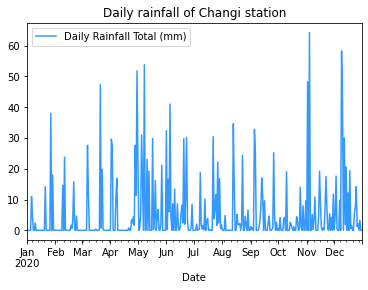

In [22]:
df = pd.read_csv('../../assets/data/Changi_daily_rainfall.csv', index_col=0, header=0, parse_dates=True)
df.loc['2020',:].plot(title='Daily rainfall of Changi station', color='#3399ff')

### bar plot

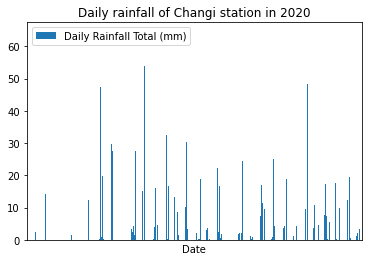

In [23]:
import matplotlib.dates as mdates
df = pd.read_csv('../../assets/data/Changi_daily_rainfall.csv', index_col=0, header=0, 
                 parse_dates=True).loc['2020',:]
ax = df.plot(title='Daily rainfall of Changi station in 2020', kind='bar', xticks=[])

### Histograms

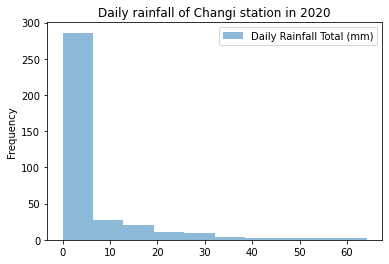

In [24]:
df = pd.read_csv('../../assets/data/Changi_daily_rainfall.csv', index_col=0, header=0, parse_dates=True)
ax = df.loc['2020',:].plot(title='Daily rainfall of Changi station in 2020', kind='hist', alpha=0.5)

### Box plots

Text(0.5, 0, 'year')

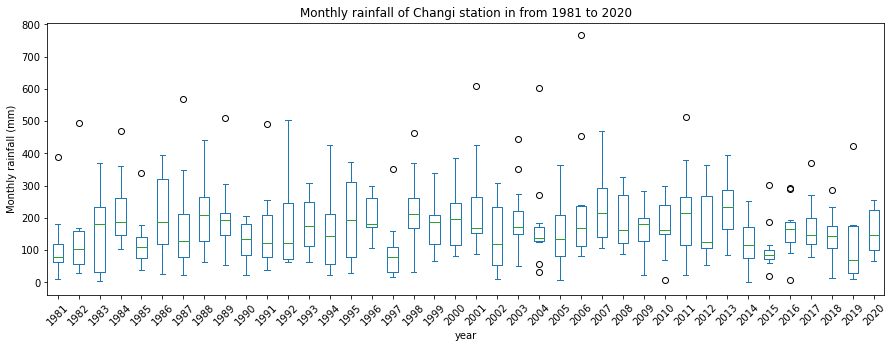

In [25]:
df = pd.read_csv('../../assets/data/Changi_daily_rainfall.csv', index_col=0, header=0, parse_dates=True)
df = df.resample('M').sum()
df = pd.concat([i[1].reset_index(drop=True) for i in df.loc['1981':'2020',:].groupby(pd.Grouper(freq='Y'))], axis=1)
df.columns = range(1981, 2021)
df.index = range(1, 13)
df.columns.name = 'year'
df.index.name = 'month'
ax = df.plot(title='Monthly rainfall of Changi station in from 1981 to 2020', xlabel='year', 
             ylabel='Monthly rainfall (mm)', kind='box', figsize=(15,5))
ax.set_xticklabels(df.columns,rotation=45)
ax.set_xlabel('year')

### Area plot

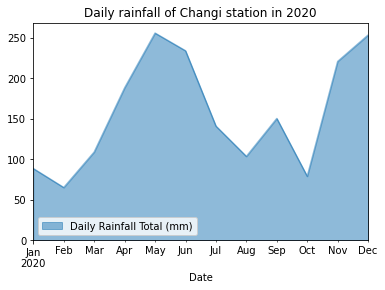

In [26]:
df = pd.read_csv('../../assets/data/Changi_daily_rainfall.csv', index_col=0, header=0, parse_dates=True)
ax = df.loc['2020',:].resample('M').sum().plot(title='Daily rainfall of Changi station in 2020',
                                               kind='area', alpha=0.5)

### Scatter plot

You need to specify the `x` and `y` arguments for scatter plot.

In [27]:
df = pd.read_csv('../../assets/data/Changi_daily_rainfall.csv', index_col=0, header=0, parse_dates=True)
df = df.loc['2020',:].resample('M').sum().reset_index()
df.head()

,Date,Daily Rainfall Total (mm)
0,2020-01-31,88.4
1,2020-02-29,65.0
2,2020-03-31,108.8
3,2020-04-30,188.0
4,2020-05-31,255.6


<AxesSubplot:title={'center':'Daily rainfall of Changi station in 2020'}, xlabel='Date', ylabel='Daily Rainfall Total (mm)'>

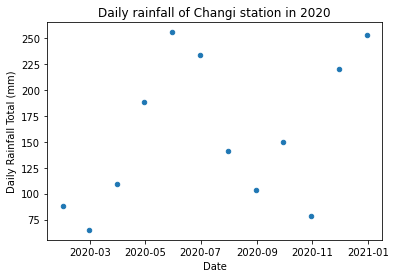

In [28]:
df.plot(x='Date', y='Daily Rainfall Total (mm)', title='Daily rainfall of Changi station in 2020',
                                               kind='scatter')

### Pie plot

In [29]:
df = pd.read_csv('../../assets/data/Changi_daily_rainfall.csv', index_col=0, header=0, parse_dates=True)
df = df.loc['2020',:].resample('M').sum()
df.index = df.index.month
df.head()

,Daily Rainfall Total (mm)
Date,
1,88.4
2,65.0
3,108.8
4,188.0
5,255.6


<AxesSubplot:title={'center':'Daily rainfall of Changi station in 2020'}, ylabel='Daily Rainfall Total (mm)'>

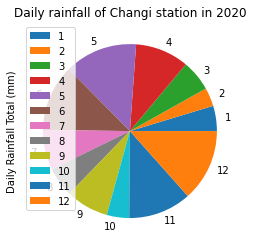

In [30]:
df.plot(y='Daily Rainfall Total (mm)', title='Daily rainfall of Changi station in 2020',
                                               kind='pie')

## References
+ [Pandas documentation](https://pandas.pydata.org/docs/).
+ [10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)